# ***Importing Python Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# ***Importing Data and Making Numpy Arrays***

In [ ]:
#importing training dataset
data = pd.read_csv('/Lineardata_train.csv')

x = data.iloc[:,1:21].values
y = data.iloc[:,0].values

y = y[np.newaxis,:]  #Changes 1D array to 2D array
y = y.T              #Transpose of y
y

y.shape




(50000, 1)

# ***Z-Score Normalisation***

In [ ]:
mu = np.mean(x,axis=0)
sigma = np.std(x,axis=0) #Compute Standard Deviation

x_mean = (x - mu)
x_norm = (x - mu)/sigma

x_norm

array([[-0.8984144 ,  0.28041868, -0.41141982, ..., -0.63988069,
         0.49752217, -0.73096293],
       [-0.26507902,  0.94889359, -1.28076708, ...,  0.43557837,
        -0.13614021,  1.21884291],
       [-0.0576161 ,  0.20887242, -0.71150275, ..., -0.42542883,
        -0.48379478, -0.58569095],
       ...,
       [-0.31954778,  0.53174828, -2.24113552, ..., -0.28270667,
         0.43749398,  0.64305246],
       [-2.38005048,  0.40118211,  0.19020459, ..., -0.33464656,
         0.2000652 ,  1.30867386],
       [ 1.39653589,  0.34479527,  1.40556658, ..., -0.13911407,
         2.50555819, -1.57998401]])

In [ ]:
data.head(10)

,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561
5,-6284.051736,-1.260712,3.036853,1.918733,2.214157,1.957066,7.978219,-5.046293,29.575808,-23.314440,...,-18.659953,-9.980004,-30.059749,12.865655,-10.557585,-42.231102,-35.692046,-13.831636,-9.262314,-18.691032
6,-15373.753706,-0.766462,0.627637,-1.271643,-0.697185,-0.069451,-4.981282,-15.215631,-18.409177,-8.485672,...,-5.895327,0.834872,-24.618700,-18.496617,52.970332,-224.664039,-16.583647,-4.880494,-5.772892,3.087271
7,6224.848304,-0.237525,3.782281,-5.670110,1.041920,1.134741,11.688859,12.115892,-5.141902,-5.640048,...,25.733965,-6.488337,20.364940,28.600771,-65.357918,130.909722,-7.280444,-2.563270,-20.165246,-19.448786
8,8560.824390,-0.607100,-5.194996,-0.682713,0.270797,-1.149809,-5.420161,11.759959,3.700489,21.654718,...,9.886708,-2.215072,-25.864651,35.354610,69.991756,94.106575,-20.088546,3.132948,31.768590,-18.301467
9,-2854.372975,1.196293,-4.025780,3.074301,-2.537228,6.331712,4.618821,22.550975,4.381451,-16.862850,...,10.356097,-1.496659,-12.446926,-40.582676,145.716369,113.250316,-18.593878,-13.172741,-63.912928,41.844928


In [ ]:
m = len(data)
m

50000

In [ ]:
m,n = x.shape
m,n

(50000, 20)

# ***Computing Cost Function***

In [ ]:
def compute_cost(x_norm, y, w, b):

  f_wb = np.dot(x_norm,w) + b
  cost = (f_wb - y)
  cost = cost**2
  cost = cost/(2*m)
  cost = np.sum(cost)

  return cost


# ***Finding Gradient Descent***

In [ ]:
def compute_gradient(x_norm, y, w, b):

  y_hat = np.dot(x_norm,w) + b
  error = (y_hat - y)

  #dj_db
  dj_db = np.sum(error)
  dj_db = dj_db/m



  #dj_dw

  dj_dw = (1/m)*(np.dot(x_norm.T, error))

  return dj_db, dj_dw


In [ ]:
def gradient_descent(x_norm, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w_history = []

    w=w_in
    b = b_in

    for i in range(num_iters):


        dj_db,dj_dw = gradient_function(x_norm, y, w, b)

        w = w - alpha * dj_dw

        b = b - alpha * dj_db
         # Save cost J at each iteration
        if i<200000:      # prevent resource exhaustion
            cost =  cost_function(x_norm, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [ ]:
initial_w = np.zeros((n,1))
initial_b = 0
# some gradient descent settings
iterations = 1000
alpha = 0.01
# run gradient descent
w_norm,b_norm,J_history, w_history = gradient_descent(x_norm ,y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w_norm, b_norm)

Iteration    0: Cost 64219095.90   
Iteration  100: Cost 8569112.53   
Iteration  200: Cost 1144470.29   
Iteration  300: Cost 152991.04   
Iteration  400: Cost 20469.92   
Iteration  500: Cost  2741.27   
Iteration  600: Cost   367.43   
Iteration  700: Cost    49.29   
Iteration  800: Cost     6.62   
Iteration  900: Cost     0.89   
w,b found by gradient descent: [[2.19940496e+01]
 [3.31470577e+01]
 [9.94553526e+00]
 [6.06136337e+00]
 [1.75479594e+02]
 [3.29906252e+02]
 [2.53976527e+02]
 [9.02556418e+02]
 [4.35808866e+02]
 [8.38887472e+01]
 [1.21189538e+02]
 [1.60609063e+03]
 [1.67661255e+03]
 [1.31336742e+03]
 [5.99368019e+02]
 [1.05490579e+04]
 [5.04413994e+02]
 [6.78415089e+02]
 [3.16474008e+03]
 [2.30425853e+02]] 60.361182636526635


In [ ]:
compute_cost(x_norm, y, w=w_norm, b=b_norm)

0.12707819240996898

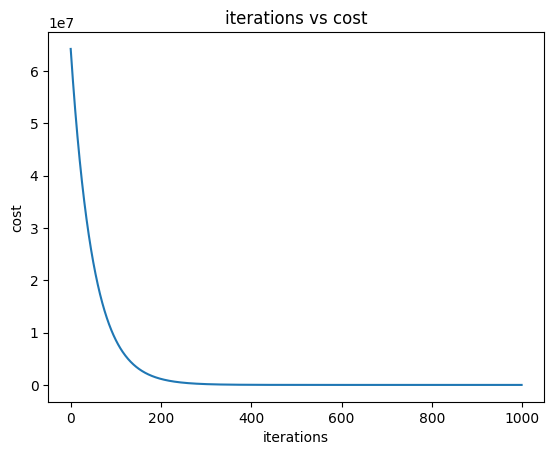

In [ ]:
t = np.arange(0, iterations)
plt.plot(t,J_history )
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")

plt.show()

# ***R2 Score***

In [ ]:


# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    a= (ss_res)/(ss_tot)
    r2=1-a

    return r2

Y_pred = np.dot(x_norm, w_norm) + b_norm

print("R2 Score")
print(r2_score(y, Y_pred))

R2 Score
[1.]


Given the remarkably low cost and a R2 score of 1, there's a potential risk of overfitting. To mitigate this, we'll implement a cross-validation set and assess its predictions to ensure robust model performance.

# ***Cross Validation Check for overfitting***

In [ ]:
data = pd.read_csv('/Lineardata_train.csv')
x = data.iloc[0:40000,1:21].values

y = data.iloc[0:40000,0].values
y=y[np.newaxis,:]
y=y.T
y

array([[ -5928.10274562],
       [  -738.89085527],
       [-20186.84158668],
       ...,
       [-11223.58412499],
       [ -3301.61447401],
       [ -4203.66603003]])

In [ ]:
mu = np.mean(x,axis=0)
sigma = np.std(x,axis=0) #Compute Standard Deviation

x_mean = (x - mu)
x_norm = (x - mu)/sigma

x_norm

array([[-0.89952244,  0.28096817, -0.40887204, ..., -0.64121201,
         0.49945553, -0.73157031],
       [-0.26581694,  0.94970342, -1.27651201, ...,  0.43462046,
        -0.13494141,  1.22285206],
       [-0.05823278,  0.20939405, -0.70836565, ..., -0.42668568,
        -0.48299901, -0.58595437],
       ...,
       [-0.28273379, -2.09023884,  0.2112759 , ..., -0.40722389,
        -0.52991852, -0.32992229],
       [ 0.54184769,  0.46144572,  0.02598928, ..., -0.56676795,
         0.43661638, -0.65614785],
       [-1.09268578,  1.16137928, -0.23257352, ..., -0.13201522,
         1.0387998 , -1.70828601]])

In [ ]:
m = 40000
m

40000

In [ ]:
m,n = x.shape
m,n

(40000, 20)

In [ ]:
def compute_cost(x_norm, y, w, b):

  f_wb = np.dot(x_norm,w) + b
  cost = (f_wb - y)
  cost = cost**2
  cost = cost/(2*m)
  cost = np.sum(cost)

  return cost


In [ ]:
def compute_gradient(x_norm, y, w, b):

  y_hat = np.dot(x_norm,w) + b
  error = (y_hat - y)

  #dj_db
  dj_db = np.sum(error)
  dj_db = dj_db/m



  #dj_dw

  dj_dw = (1/m)*(np.dot(x_norm.T, error))

  return dj_db, dj_dw

In [ ]:
def gradient_descent(x_norm, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w_history = []

    w=w_in
    b = b_in

    for i in range(num_iters):


        dj_db,dj_dw = gradient_function(x_norm, y, w, b)

        w = w - alpha * dj_dw

        b = b - alpha * dj_db
         # Save cost J at each iteration
        if i<200000:      # prevent resource exhaustion
            cost =  cost_function(x_norm, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [ ]:
initial_w = np.zeros((n,1))
initial_b = 0
# some gradient descent settings
iterations = 1000
alpha = 0.01
# run gradient descent
w_norm,b_norm,J_history, w_history = gradient_descent(x_norm ,y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w_norm, b_norm)

Iteration    0: Cost 64441403.30   
Iteration  100: Cost 8583838.67   
Iteration  200: Cost 1145173.57   
Iteration  300: Cost 153014.23   
Iteration  400: Cost 20476.70   
Iteration  500: Cost  2744.43   
Iteration  600: Cost   368.39   
Iteration  700: Cost    49.53   
Iteration  800: Cost     6.67   
Iteration  900: Cost     0.90   
w,b found by gradient descent: [[2.19710942e+01]
 [3.31517014e+01]
 [9.97026563e+00]
 [6.03740160e+00]
 [1.75910497e+02]
 [3.29275655e+02]
 [2.53988370e+02]
 [9.01813819e+02]
 [4.34991290e+02]
 [8.38125874e+01]
 [1.21143700e+02]
 [1.60326087e+03]
 [1.67463587e+03]
 [1.31820380e+03]
 [5.97180967e+02]
 [1.05666403e+04]
 [5.04791629e+02]
 [6.78187214e+02]
 [3.16106676e+03]
 [2.29873717e+02]] 77.26372798729972


In [ ]:
compute_cost(x_norm, y, w=w_norm, b=b_norm)

0.12888896652052217

In [ ]:
x_test = data.iloc[40001:500001,1:21]
x_test

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
40001,-0.618576,5.222443,0.406589,-3.370204,-3.222479,9.161103,-12.605723,-7.465044,25.748740,0.645956,-10.322295,3.739687,54.233027,-14.584753,4.988900,-36.191444,-10.879139,-40.480525,4.400838,-42.907315
40002,-0.398014,0.867377,1.378218,-1.780250,-1.798348,-1.822382,-5.218400,-13.434848,25.357143,1.708040,3.975443,6.449202,-26.738012,-4.669001,-9.727967,-213.839319,-5.050234,12.957648,58.224124,27.576099
40003,0.383696,2.558227,1.139335,1.421192,-0.528055,-0.654378,-5.581162,8.265880,0.299431,-2.724842,10.407428,-6.580987,-43.846525,-14.278889,-111.630099,-37.420398,-33.526785,18.217070,23.522589,-1.552342
40004,-0.386058,1.125976,2.372546,2.275252,-3.194435,1.289263,-1.028185,0.485469,-1.862515,2.001194,0.644701,-0.092773,-3.739834,-4.345057,-34.148039,260.479990,1.425653,0.946440,-34.777467,-10.735782
40005,0.060692,2.695504,4.329682,3.847038,-3.073733,4.531679,-1.223751,-31.337195,-12.727515,-10.040566,8.713627,-2.531028,-0.146825,5.012959,4.935520,13.641149,10.614591,-29.870722,4.735756,1.719702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.029910,-0.928164,-2.463563,5.312071,2.070290,0.835355,-4.421930,18.292309,-10.357047,2.282597,-2.827488,17.940836,25.724137,-29.713820,0.625372,-183.410260,19.439815,6.640099,-41.093484,-1.010290
49996,-0.223475,0.341542,-4.423256,-0.104668,4.384320,-2.290826,4.612476,29.667901,-9.675776,4.867704,-17.744738,-0.708422,15.907878,10.865072,-31.280568,-354.186800,6.363459,0.370644,35.952861,3.752642
49997,-0.321085,1.608386,-11.177100,-1.140550,-10.832891,-8.625981,-27.740091,-14.166217,9.169728,-6.108281,3.841781,-17.941987,-2.167623,11.336067,-2.542123,-98.327808,-13.690353,-4.299753,16.053032,14.812715
49998,-2.383432,1.214911,0.925113,0.017874,2.022561,1.209647,5.006908,-12.043059,-5.756141,-0.690947,5.308136,12.387029,20.220357,-1.359887,83.958829,-314.127483,-2.550699,-5.082801,7.514089,30.150485


In [ ]:
mu     = np.mean(x_test,axis=0)
sigma  = np.std(x_test,axis=0)
x_test_norm = (x_test - mu)/sigma
x_test_norm.shape

(9999, 20)

In [ ]:
y_pred_cv=np.dot(x_test_norm, w_norm) + b_norm
y_pred_cv=y_pred_cv.T
y_pred_cv

array([[ -204.91103209, -5034.22130496, -5924.28858036, ...,
        -8161.43666576, -9188.77715736,  3431.95143676]])

In [ ]:
y_cv = data.iloc[40001:50001,0]
y_cv=y_cv[np.newaxis,:]
y_cv

<ipython-input-96-55589fc7d91d>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_cv=y_cv[np.newaxis,:]


array([[ -217.48343391, -4993.79279268, -6007.06435646, ...,
        -8246.69722146, -9101.10137698,  3420.72986003]])

In [ ]:
y_cv.shape

(1, 9999)

In [ ]:
y_cv = y_cv.flatten()
y_cv


array([ -217.48343391, -4993.79279268, -6007.06435646, ...,
       -8246.69722146, -9101.10137698,  3420.72986003])

# ***R2 score of Cross Validation Set***

In [ ]:
def r2_score(y_cv, y_pred_cv):
    mean_y_cv = np.mean(y_cv)
    ss_tot_cv = (y_cv - mean_y_cv) ** 2
    ss_tot_cv = sum(ss_tot_cv)
    ss_res_cv = (y_cv - y_pred_cv) ** 2
    ss_res_cv = sum(ss_res_cv)
    a= (ss_res_cv)/(ss_tot_cv)
    r2=1-a

    return r2

y_pred_cv = np.dot(x_test_norm, w_norm) + b_norm
y_pred_cv=y_pred_cv.T
y_pred_cv = y_pred_cv.flatten()

print("R2 Score")
print(r2_score(y_cv, y_pred_cv))

R2 Score
0.9998757489175094


Since the R2 score is coming close to 1 , we can infer that the model is predicting correctly

# ***Predicting Labels and saving csv files***

In [ ]:
#importing dataset
data_pred = pd.read_csv('/content/Lineardata_test.csv')
x_test= data_pred.iloc[:,1:21].values

In [ ]:
mu     = np.mean(x_test,axis=0)
sigma  = np.std(x_test,axis=0)
x_test_norm = (x_test - mu)/sigma
x_test_norm.shape

(10000, 20)

In [ ]:
y_pred=np.dot(x_test_norm, w_norm) + b_norm
y_pred

array([[ -5427.76938884],
       [ 17698.86581462],
       [  4678.94673112],
       ...,
       [  9562.84136767],
       [-15205.99716909],
       [ -1379.94636386]])

In [ ]:
y_pred.shape

(10000, 1)

In [ ]:
data_pred.insert(0,'label',y_pred)

In [ ]:
#saving the dataframe as a csv file
data_pred.to_csv('Lineardata_test_pred.csv',index=False)